In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [17]:
df = pd.read_csv('/Users/hipprofessional/Downloads/Petroleum_Price_Forecaster-main-2/notebook/data/Train_data_petrol_price.csv')
df.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [18]:
df.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [19]:
df_new = df.dropna()

In [20]:
df_new.isnull().sum()

Date            0
Petrol (USD)    0
dtype: int64

In [21]:
df_new.shape

(811, 2)

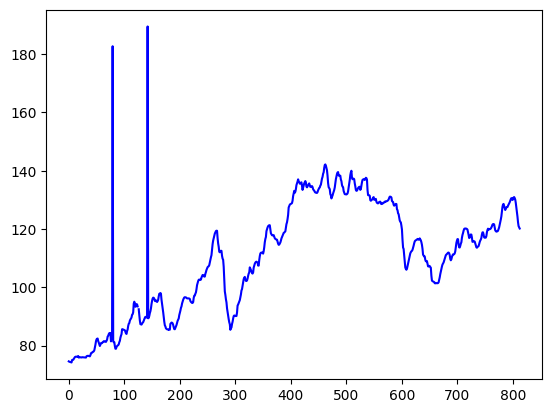

In [50]:
plt.plot(df['Petrol (USD)'],color='blue')

In [23]:
df_new['Petrol (USD)'].describe()

count    811.000000
mean     110.330481
std       19.241182
min       74.210000
25%       94.525000
50%      112.420000
75%      128.560000
max      189.510000
Name: Petrol (USD), dtype: float64

In [24]:
df_new.duplicated().sum()

0

In [25]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 811 entries, 0 to 812
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          811 non-null    object 
 1   Petrol (USD)  811 non-null    float64
dtypes: float64(1), object(1)
memory usage: 19.0+ KB


<Axes: ylabel='Petrol (USD)'>

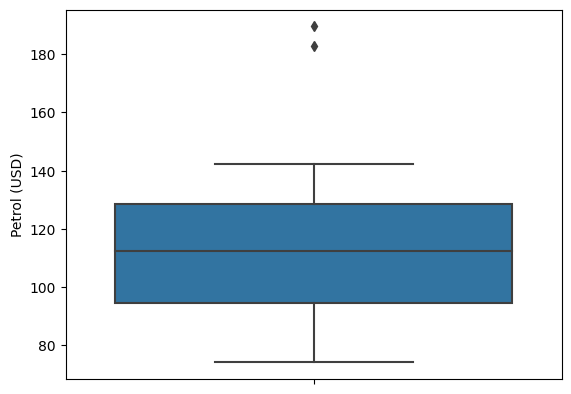

In [26]:
sns.boxplot(y=df_new['Petrol (USD)'])

<Axes: xlabel='Petrol (USD)', ylabel='Count'>

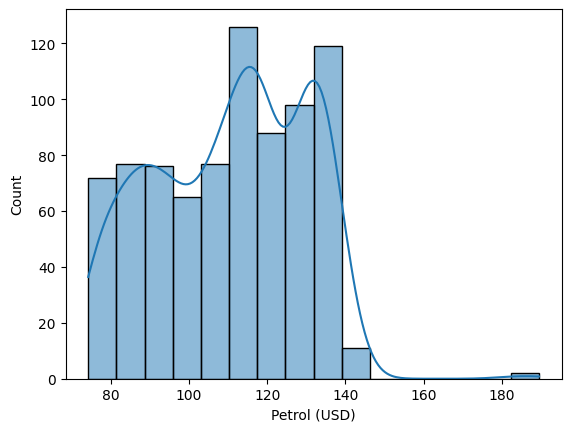

In [27]:
sns.histplot(df_new['Petrol (USD)'],kde=True)

In [28]:
df_new.dtypes

Date             object
Petrol (USD)    float64
dtype: object

In [29]:
df_new['Date'] = pd.to_datetime(df_new['Date'])

/var/folders/b4/_z23407d3v9d_yttcm21zm5h0000gn/T/ipykernel_2852/1250731367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = pd.to_datetime(df_new['Date'])


In [30]:
df_new.dtypes

Date            datetime64[ns]
Petrol (USD)           float64
dtype: object

In [31]:
df_new['date'] = df_new['Date'].dt.day
df_new['month'] = df_new['Date'].dt.month
df_new['year'] = df_new['Date'].dt.year

df_new.head()

/var/folders/b4/_z23407d3v9d_yttcm21zm5h0000gn/T/ipykernel_2852/357421390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['date'] = df_new['Date'].dt.day
/var/folders/b4/_z23407d3v9d_yttcm21zm5h0000gn/T/ipykernel_2852/357421390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month'] = df_new['Date'].dt.month
/var/folders/b4/_z23407d3v9d_yttcm21zm5h0000gn/T/ipykernel_2852/357421390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,Date,Petrol (USD),date,month,year
0,2003-06-09,74.59,9,6,2003
1,2003-06-16,74.47,16,6,2003
2,2003-06-23,74.42,23,6,2003
3,2003-06-30,74.35,30,6,2003
4,2003-07-07,74.28,7,7,2003


In [32]:
df_new = df_new.drop(['Date'],axis=1)

In [33]:
df_new.dtypes

Petrol (USD)    float64
date              int32
month             int32
year              int32
dtype: object

In [34]:
df_new['Petrol (USD)'].skew()

-0.0987574434522889

In [35]:
upperlimit = df_new['Petrol (USD)'].mean() + 3*df_new['Petrol (USD)'].std()
lowerlimit = df_new['Petrol (USD)'].mean() - 3*df_new['Petrol (USD)'].std()

upperlimit,lowerlimit

(168.05402693198658, 52.606934843599134)

In [36]:
df_new[(df_new['Petrol (USD)']>upperlimit) | (df_new['Petrol (USD)']<lowerlimit)]

,Petrol (USD),date,month,year
79,182.73,13,12,2004
142,189.51,27,2,2006


In [37]:
df_refined = df_new[df_new['Petrol (USD)']<upperlimit]

In [38]:
df_refined.shape

(809, 4)

<Axes: ylabel='Petrol (USD)'>

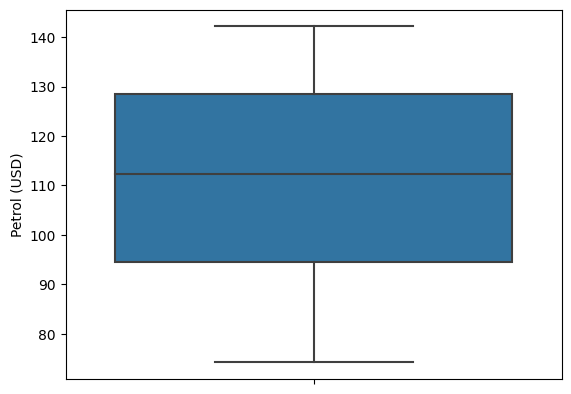

In [39]:
# Outliers are removed
sns.boxplot(y=df_refined['Petrol (USD)'])


In [40]:
df_refined.describe()

,Petrol (USD),date,month,year
count,809.000000,809.000000,809.000000,809.000000
mean,110.143115,15.741656,6.601978,2010.736712
std,18.890684,8.804463,3.438972,4.499026
min,74.210000,1.000000,1.000000,2003.000000
25%,94.430000,8.000000,4.000000,2007.000000
50%,112.370000,16.000000,7.000000,2011.000000
75%,128.430000,23.000000,10.000000,2015.000000
max,142.170000,31.000000,12.000000,2018.000000


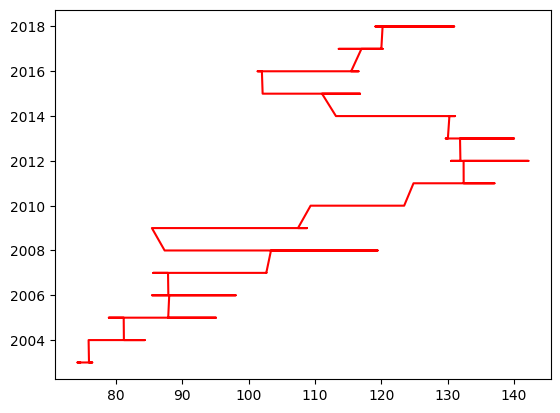

In [41]:
fig , axs = plt.subplots()
axs.plot(df_refined['Petrol (USD)'],df_refined['year'],color='red')


In [42]:
X = df_refined.drop(['Petrol (USD)'],axis=1)

In [43]:
y=df_refined['Petrol (USD)']

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV


In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
import numpy as np
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2 = r2_score(true,predicted)
    return mae,rmse,r2

In [47]:
models = {
    'Linear Regression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'Adaboost Regressor':AdaBoostRegressor(),
}

modellist=[]
r2list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_train_Pred=model.predict(X_train)
    y_test_Pred=model.predict(X_test)
    
    model_train_mae,model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_Pred)
    model_test_mae,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_Pred)
    
    print(list(models.keys())[i])
    modellist.append(list(models.keys())[i])
    
    print('training set')
    print('mae: {:.4f}'.format(model_train_mae))
    print('rmse: {:.4f}'.format(model_train_rmse))
    print('r2 score: {:.4f}'.format(model_train_r2))
    print('---------------------------------------------')
    
    print('testing set')
    print('mae: {:.4f}'.format(model_test_mae))
    print('rmse: {:.4f}'.format(model_test_rmse))
    print('r2 score: {:.4f}'.format(model_test_r2))
    r2list.append(model_test_r2)
    
    print('=============================================')
    print('\n')

Linear Regression
training set
mae: 11.1920
rmse: 13.0326
r2 score: 0.5241
---------------------------------------------
testing set
mae: 11.1259
rmse: 12.9377
r2 score: 0.5279


Lasso
training set
mae: 11.2047
rmse: 13.0386
r2 score: 0.5237
---------------------------------------------
testing set
mae: 11.1326
rmse: 12.9411
r2 score: 0.5276


Ridge
training set
mae: 11.1920
rmse: 13.0326
r2 score: 0.5241
---------------------------------------------
testing set
mae: 11.1260
rmse: 12.9377
r2 score: 0.5279


K-Neighbors Regressor
training set
mae: 5.0640
rmse: 6.1638
r2 score: 0.8935
---------------------------------------------
testing set
mae: 6.5357
rmse: 7.9510
r2 score: 0.8217


Decision Tree
training set
mae: 0.0000
rmse: 0.0000
r2 score: 1.0000
---------------------------------------------
testing set
mae: 0.9984
rmse: 1.4643
r2 score: 0.9940


Random Forest Regressor
training set
mae: 0.3558
rmse: 0.5055
r2 score: 0.9993
---------------------------------------------
testing set


In [48]:
random_model = RandomForestRegressor(n_estimators=42)
random_model.fit(X_train,y_train)
y_pred = random_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
score

99.42051152107014

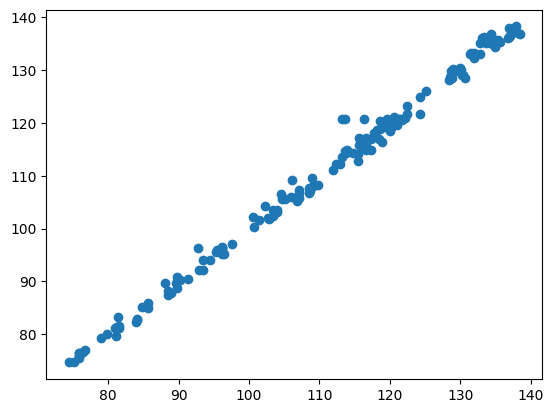

In [49]:
plt.scatter(y_test,y_pred)

In [ ]:
# filename = 'model.sav'
# pickle.dump(model, open(filename, 'wb'))
# pickle.dump(model, open('model.pkl','wb'))
# model = pickle.load(open(f'model.pkl', 'rb'))
# print(model.predict([2004]))